## Setup


In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
metadata = pd.read_csv("/rds/general/project/hda_24-25/live/ML/Group14/metadata_compiled.csv")
metadata.shape

(34434, 52)

In [4]:
# View data
metadata.head(3)

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Column names
metadata.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

## Data Cleaning

In [6]:
# Different values for 'status'
metadata['status'].value_counts()

status
healthy        15476
symptomatic     3873
COVID-19        1315
Name: count, dtype: int64

In [7]:
# Number of NA values in 'status' column
sum(metadata['status'].isna())

13770

In [8]:
# Drop any rows with NA value for 'status' column
metadata_reduced = metadata.dropna(subset = 'status')
metadata_reduced.shape

(20664, 52)

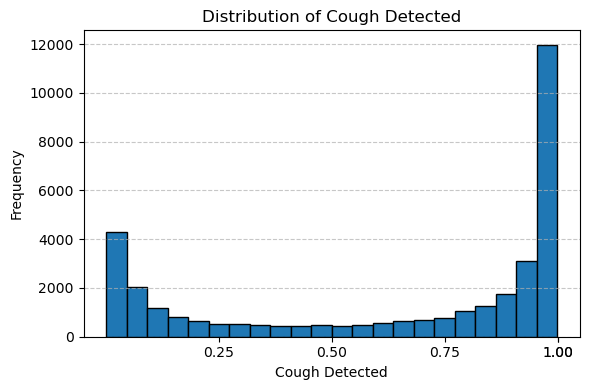

In [9]:
# Graph showing distribution of cough detected
plt.figure(figsize=(6, 4))
plt.hist(metadata['cough_detected'], bins='auto', edgecolor='black')
plt.title('Distribution of Cough Detected')
plt.xlabel('Cough Detected')
plt.ylabel('Frequency')
plt.xticks([1, 0.25, 0.5, 0.75, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Keep rows only where 'cough_detected' >= 0.75
metadata_reduced = metadata_reduced[metadata_reduced['cough_detected'] >= 0.75]
metadata_reduced.shape

(14189, 52)

In [11]:
# Group symptomatic and COVID-19 together
metadata_reduced['status'] = metadata_reduced['status'].replace({'symptomatic': 'likely_covid', 
                                                                 'COVID-19': 'likely_covid'})
metadata_reduced['status'].value_counts()

status
healthy         10628
likely_covid     3561
Name: count, dtype: int64

In [12]:
# Remove unnecessary columns
columns_to_remove = [
    'Unnamed: 0', 'status_SSL', 'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 
    'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 
    'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',  'quality_4', 
    'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'
]
metadata_reduced = metadata_reduced.drop(columns=columns_to_remove)
metadata_reduced.columns

Index(['uuid', 'datetime', 'cough_detected', 'latitude', 'longitude', 'age',
       'gender', 'respiratory_condition', 'fever_muscle_pain', 'status'],
      dtype='object')

In [14]:
# Save csv file
metadata.to_csv("/rds/general/project/hda_24-25/live/ML/Group14/metadata_reduced.csv")